# Lab 01

In [ ]:
# Install some necessary libraries
!wget https://www.cse.iitb.ac.in/~diptesh/data.tar.gz && tar -xvzf data.tar.gz
!rm data.tar.gz
!pip install gensim
!pip insstall spacy
!pip isntall pyldavis

--2023-03-01 16:35:41--  https://www.cse.iitb.ac.in/~diptesh/data.tar.gz
Resolving www.cse.iitb.ac.in (www.cse.iitb.ac.in)... 103.21.127.134
Connecting to www.cse.iitb.ac.in (www.cse.iitb.ac.in)|103.21.127.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73485589 (70M) [application/x-gzip]
Saving to: ‘data.tar.gz’

data.tar.gz         100%[===================>]  70.08M  12.0MB/s    in 7.2s    

2023-03-01 16:35:50 (9.79 MB/s) - ‘data.tar.gz’ saved [73485589/73485589]

data/
data/papers.csv
data/.DS_Store
data/articles+4.txt
data/authors.csv
data/paper_authors.csv
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: unknown command "insstall" - maybe you meant "install"
ERROR: unknown command "isntall" - maybe you meant "install"


In [ ]:
# Import some libraries
import os
import re
import string
import pandas as pd
import numpy as np
import tensorflow as tf
import gensim
import nltk
import spacy


from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

#nltk coding
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data_frame = pd.read_csv('data/papers.csv')

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
...,...,...,...,...,...,...,...
6555,994,1994,Single Transistor Learning Synapses,NaN,994-single-transistor-learning-synapses.pdf,Abstract Missing,Single Transistor Learning Synapses\n\nPaul Ha...
6556,996,1994,"Bias, Variance and the Combination of Least Sq...",NaN,996-bias-variance-and-the-combination-of-least...,Abstract Missing,"Bias, Variance and the Combination of\nLeast S..."
6557,997,1994,A Real Time Clustering CMOS Neural Engine,NaN,997-a-real-time-clustering-cmos-neural-engine.pdf,Abstract Missing,A Real Time Clustering CMOS\nNeural Engine\nT....
6558,998,1994,Learning direction in global motion: two class...,NaN,998-learning-direction-in-global-motion-two-cl...,Abstract Missing,Learning direction in global motion: two\nclas...


In [ ]:
# Challenge 1
# Remove the columns
#TODO Use the pandas dataframe above and drop any columns except 'paper_text'
papers = data_frame['paper_text']

# sample only 100 papers
papers = papers.sample(100)

# Print out the first rows of papers
papers.head()

6537    Pattern Playback in the '90s\nMalcolm Slaney\n...
6373    Decoding Cursive Scripts\n\nYoram Singer\nand\...
1600    Probability Estimates for Multi-class\nClassif...
5839    Deconvolving Feedback Loops\nin Recommender Sy...
401     Blind Separation of Radio Signals\nFading Chan...
Name: paper_text, dtype: object

In [ ]:
print(len(papers))
print(type(papers.values[1]))

101
<class 'str'>


In [ ]:
# Challenge 2
# Remove punctuation
#TODO: Use map and lambda with regular expressions to remove puncutation marks like comma, slash, fullstop, exclamation marks etc.
papers['paper_text_processed'] = [(str(papers.values[i])).replace(string.punctuation, '').replace('\n', ' ').strip() for i in range (len(papers))]

# Convert the titles to lowercase
# TODO: Use map and lambda to lowercase the text
papers['paper_text_processed'] = [text.lower() for text in papers['paper_text_processed']]

# Print out the first rows of papers
papers['paper_text_processed'] = pd.DataFrame(papers['paper_text_processed'])
papers['paper_text_processed'].head()

,0
0,pattern playback in the '90s malcolm slaney in...
1,decoding cursive scripts yoram singer and naf...
2,probability estimates for multi-class classifi...
3,deconvolving feedback loops in recommender sys...
4,blind separation of radio signals fading chann...


In [ ]:
print(papers['paper_text_processed'][0])

0      pattern playback in the '90s malcolm slaney in...
1      decoding cursive scripts yoram singer and naft...
2      probability estimates for multi-class classifi...
3      deconvolving feedback loops in recommender sys...
4      blind separation of radio signals fading chann...
                             ...                        
96     map estimation in binary mrfs via bipartite mu...
97     coarticulation in markov decision processes kh...
98     a statistical model for tensor pca emile richa...
99     beating sgd: learning svms in sublinear time e...
100                               0 0  pattern playba...
Name: 0, Length: 101, dtype: object


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

print(data_words[:1][0][:30])

['pattern', 'playback', 'in', 'the', 'malcolm', 'slaney', 'interval', 'research', 'corporation', 'page', 'mill', 'road', 'palo', 'alto', 'ca', 'malcolm', 'interval', 'com', 'abstract', 'deciding', 'the', 'appropriate', 'representation', 'to', 'use', 'for', 'modeling', 'human', 'auditory', 'processing']


In [ ]:
%%time
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


CPU times: user 11.1 s, sys: 19.7 ms, total: 11.1 s
Wall time: 11.2 s


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
#TODO: return the set of processed documents without any stop words. Do not forget to use the simple_preprocess function on each word. HINT: List of Lists
def remove_stopwords(texts):
  if isinstance(texts, str):
    return [text for text in texts.split() if text not in set(stop_words)] 
  else:
    texts_list = [remove_stopwords(text) for text in texts]
    return texts_list

#TODO: return bigrams for each document in texts.
def make_bigrams(texts):
    return bigram[texts]

# #TODO: return trigrams for each document in texts.
def make_trigrams(texts):
    return trigram[texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
print(data_words_bigrams)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = [lemmatization(i, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']) for i in data_words_bigrams]

print(data_lemmatized[:1][0][:30])

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


KeyboardInterrupt: ignored

In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

In [ ]:
%%time
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

# Lab 2

In [ ]:
import os
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
# Challenge 01
def load_data(path, file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considered as title of document)
    """
    documents_list = []
    titles = []
    with open(os.path.join(path, file_name), "r") as fin:
        for line in fin.readlines():
            # TODO: strip (remove spaces at the start and end) a doc and add it to the documents list.
            text = line.strip()
            documents_list.append(text)
            
    print("Total Number of Documents:", len(documents_list))
    titles.append( text[0:min(len(text), 100)] )
    return documents_list,titles

In [ ]:
# Challege 02
def preprocess_data(doc_set):
    """
    Input  : document list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        
        # TODO: Convert into lower case and tokenize.
        raw = i.lower().strip()
        tokens = set(tokenizer.tokenize(raw))
        
        # TODO: remove stop words from tokens
        stopped_tokens = [[word.strip() for word in token.split() if word not in en_stop] for token in tokens]
        stopped_tokens = list(filter(None, stopped_tokens))

        # TODO: stem tokens
        stemmed_tokens = [p_stemmer.stem(token[0]) or p_stemmer.stem(token) for token in stopped_tokens]
        
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [ ]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    
    return dictionary, doc_term_matrix

In [ ]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=10, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [ ]:
# Challenge 03
def plot_graph(doc_clean,start, stop, step):
    
    # TODO: Prepare corpus by calling prepare_corpus func.
    dictionary,doc_term_matrix = prepare_corpus(doc_clean)
    
    # TODO: Get coherence values by calling compute_coherence_values func.
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, doc_term_matrix=doc_term_matrix, doc_clean=doc_clean, stop=stop, step=step)
    
    # Show graph
    x = range(start, stop, step)
    
    # TODO: Plot coherence score values
    plt.plot(x, coherence_values)
    
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [ ]:
# LSA Model
number_of_topics=7
words=10
document_list,titles=load_data("", "./data/articles+4.txt")
clean_text=preprocess_data(document_list)

Total Number of Documents: 4551


In [ ]:
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

[(0, '0.118*"year" + 0.113*"make" + 0.108*"work" + 0.107*"say" + 0.105*"time" + 0.104*"like" + 0.095*"get" + 0.093*"take" + 0.092*"look" + 0.091*"one"'), (1, '-0.195*"play" + 0.115*"vote" + 0.107*"govern" + -0.106*"game" + -0.103*"look" + 0.098*"report" + 0.094*"bank" + 0.092*"campaign" + 0.089*"elect" + 0.086*"nation"'), (2, '0.142*"bank" + 0.101*"manag" + -0.094*"republican" + -0.093*"american" + 0.092*"market" + -0.090*"elect" + -0.085*"call" + -0.084*"live" + -0.084*"democrat" + 0.081*"player"'), (3, '-0.160*"year" + 0.145*"win" + -0.123*"work" + 0.114*"elect" + 0.114*"vote" + 0.107*"support" + -0.106*"film" + 0.102*"attack" + -0.097*"one" + -0.095*"use"'), (4, '0.171*"report" + -0.149*"vote" + -0.146*"leav" + -0.145*"brexit" + -0.125*"minist" + 0.123*"bank" + -0.122*"eu" + -0.119*"campaign" + -0.111*"referendum" + -0.107*"want"'), (5, '0.162*"use" + 0.141*"need" + -0.125*"bank" + -0.111*"star" + -0.105*"music" + -0.104*"film" + -0.100*"song" + 0.100*"commun" + -0.099*"record" + -0

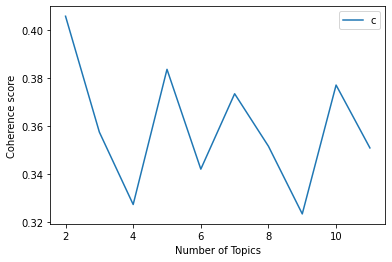

In [ ]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

# Lab 03

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups

pd.set_option("display.max_colwidth", 200)

In [ ]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

11314

In [ ]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:

news_df = pd.DataFrame({'document':documents})
print(news_df)

                                                                                                                                                                                                      document
0      Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe...
1      \n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n...
2      Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n   If you want to conti...
3      Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it?  ATT's last product in this area (a) was priced over\n$1000, as I suspect '

In [ ]:
news_df['document']

0        Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe...
1        \n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n...
2        Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n   If you want to conti...
3        Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it?  ATT's last product in this area (a) was priced over\n$1000, as I suspect 'clipper' phones will be; (b) ca...
4        Well, I will have to change the scoring on my playoff pool.  Unfortunately\nI don't have time right now, but I will certainly post the new scoring\nrules b

In [ ]:
from nltk.tokenize.sonority_sequencing import punctuation
# TODO: Remove everything except alphabets

news_df['clean_doc'] = ["".join([char for char in doc if (char not in list(punctuation)) and (not char.isdigit())]).replace("\n", " ") for doc in news_df['document']]
news_df['clean_doc'] = news_df['clean_doc']

# TODO: Remove short words (words with len < 4) from `clean_doc` column.
news_df['clean_doc'] = [" ".join([word for word in doc.split() if len(word) > 4]) for doc in news_df['clean_doc']]

# TODO: Make all text lowercase
news_df['clean_doc'] = [doc.lower() for doc in news_df['clean_doc']]

In [ ]:
news_df['clean_doc'].values[1]

'expect people actually accept atheism little faith jimmy logic steam sorry sorry these feelings denial about faith pretend happily after anyway maybe start newsgroup altatheisthard bummin byebye forget flintstones chewables timmons'

In [ ]:
from nltk.corpus import stopwords
from itertools import chain

stop_words = stopwords.words('english')

# TODO: Tokenization
tokenizer = RegexpTokenizer(r'\w+')
tokenized_doc = [tokenizer.tokenize(doc) for doc in news_df['clean_doc']]

# print(len(tokenized_doc))
tokenized_doc = list(chain(*tokenized_doc))


# TODO: Remove stop-words
tokenized_doc = [word for word in tokenized_doc if word not in set(stop_words)]

# de-tokenization
detokenized_doc = []
for i in range(len(news_df)):
    t = ''.join(tokenized_doc[i])
    detokenized_doc.append(t)


news_df['clean_doc'] = detokenized_doc
# news_df['clean_doc']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

# TODO: Use fit_transform func to transform `clean_doc` with TfidfVectorizer
X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # check shape of the document-term matrix

(11314, 1000)

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

# TODO: Fit svd_model on X
svd_model.fit(X)

len(svd_model.components_)

20

In [ ]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0]," ")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=4be539a203329f1cc6bfbe082706ba881f6bd12350f592d09de0bbb86a6df85a
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=ab596e923d6dd4db8790c38cffc7f48938208d5f97b2e5ad1301c57bcb258e08
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


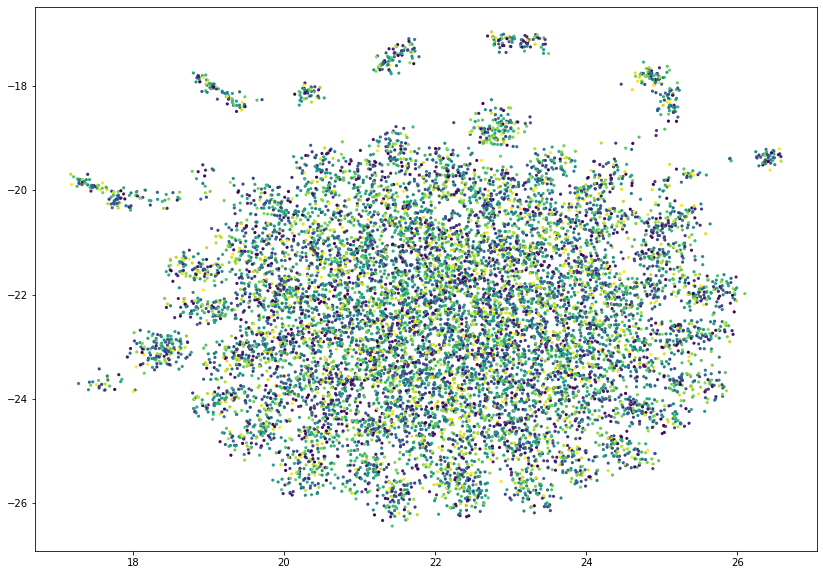

In [ ]:
!pip install umap-learn
import umap.umap_ as umap

X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(14,10))
plt.scatter(embedding[:, 0], embedding[:, 1], 
            c = dataset.target,
            s = 10, # size
            edgecolor='none')
plt.show()